# Visualize Hayabusa2 trajectory

Yuri Shimane, 2020/10/21

Data taken from: https://www.jaxa.jp/projects/sas/hayabusa2/pdf/traplaninfo20150430.pdf


Unofficial translation on the dataset header description: 

1. The generated data is for visualization of Hayabusa2's trajectory within the solar system. The actual trajectory may differ from the generated dataset with future orbital determination and correction maneuvers.

2. The data is released for public outreach activities; data usage policy may be viewed at: http://www.jaxa.jp/policy_j.html

3. The data is a preliminary trajectory based on information obtained at the launch date, and may differ from the actual flown trajectory.

4. Numerical accuracy: 0.0001au (~15,000 km)

5. The trajectory data inccludes the period from launch up to approach to Ryugu (~6,000 km)

6. Unless significant modification occurs midflight, the trajectory in this data is not modified. 


#### Dependencies

Non-standard modules used in this Notebook is spiceypy, a Python wrapper for NAIF SPICE functions. For installation, run
```python
pip install spiceypy
```
or
```python
conda config --add channels conda-forge
conda install spiceypy
```

https://spiceypy.readthedocs.io/en/master/

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import spiceypy as spice

### Load NAIF SPICE kernel

SPICE kernels are data files which are used within the SPICE framework. Here, we load the standard ephemeris second kernel for handling time-related data.

In [52]:
# load ephemeris-second spice kernel for UTC to ephemeris second conversion
spice.furnsh('./naif0012.tls')

### Load dataset
The data distributed as a pdf file has been saved a priori as a .csv for easier handling. 
The entries in the data are:

```
- L+      : time since launch [day]
- X, Y, Z : cooridnates of the spacecraft (Hbs2), Earth, and Ryugu (1999JU3) in the ecliptic coordinate system [AU]
- Rs      : spacecraft-Sun distance [10^4 km]
- Re      : spacecraft-Earth distance [10^4 km]
- Vs      : spacecarft speed w.r.t. Sun [km/s]
- Ve      : spacecraft speed w.r.t. Earth [km/s]
- alpha   : right ascension w.r.t. Earth [deg]
- delta   : declination w.r.t. Earth [deg]
- Dflt    : Flight distance [10^4 km]
```

In [85]:
# load data as pandas dataframe
data = pd.read_csv("traplaninfo20150430.csv")
# get beginning and end of data as strings
tstart, tend = data.iloc[0,:]["UTC"], data.iloc[-1,:]["UTC"]
data

,UTC,L+,X_Hbs2,Y_Hbs2,Z_Hbs2,X_Earth,Y_Earth,Z_Earth,X_1999JU3,Y_1999JU3,Z_1999JU3,Rs,Re,Ra,Vs,Ve,alpha,delta,Dflt
0,2014/12/03.05:00:00,0.0,0.325037,0.930594,-0.000010,0.325234,0.930600,-0.000031,-0.805848,-1.019952,-0.045649,14746.2,3.0,33736.3,23.54,6.92,-175.83,4.86,0.0
1,2014/12/04.05:00:00,1.0,0.309534,0.937664,-0.002231,0.308668,0.936062,-0.000030,-0.796246,-1.030534,-0.044366,14771.8,42.7,33778.4,30.20,4.78,69.75,-28.92,257.1
2,2014/12/05.05:00:00,2.0,0.293598,0.944389,-0.004351,0.292008,0.941235,-0.000030,-0.786536,-1.040977,-0.043077,14795.0,83.5,33816.6,30.15,4.68,70.98,-29.05,517.8
3,2014/12/06.05:00:00,3.0,0.277564,0.950806,-0.006443,0.275259,0.946119,-0.000030,-0.776723,-1.051282,-0.041782,14817.9,123.7,33853.9,30.10,4.64,71.41,-29.08,778.0
4,2014/12/07.05:00:00,4.0,0.261440,0.956926,-0.008523,0.258425,0.950711,-0.000029,-0.766806,-1.061448,-0.040482,14840.6,163.8,33890.3,30.05,4.63,71.63,-29.08,1037.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2018/05/31.05:00:00,1275.0,-0.178935,0.945280,-0.048265,-0.355620,-0.949381,0.000040,-0.178914,0.945334,-0.048264,14410.4,28475.9,0.9,33.09,59.93,84.26,21.88,313272.5
1276,2018/06/01.05:00:00,1276.0,-0.197571,0.941389,-0.049961,-0.339745,-0.955346,0.000041,-0.197557,0.941438,-0.049961,14409.2,28464.2,0.8,33.10,59.94,85.38,21.86,313558.5
1277,2018/06/02.05:00:00,1277.0,-0.216144,0.937186,-0.051640,-0.323774,-0.961041,0.000042,-0.216135,0.937231,-0.051640,14408.9,28453.2,0.7,33.10,59.94,86.50,21.84,313844.4
1278,2018/06/03.05:00:00,1278.0,-0.234646,0.932673,-0.053302,-0.307711,-0.966464,0.000042,-0.234641,0.932713,-0.053303,14409.5,28442.9,0.6,33.10,59.94,87.63,21.81,314130.4


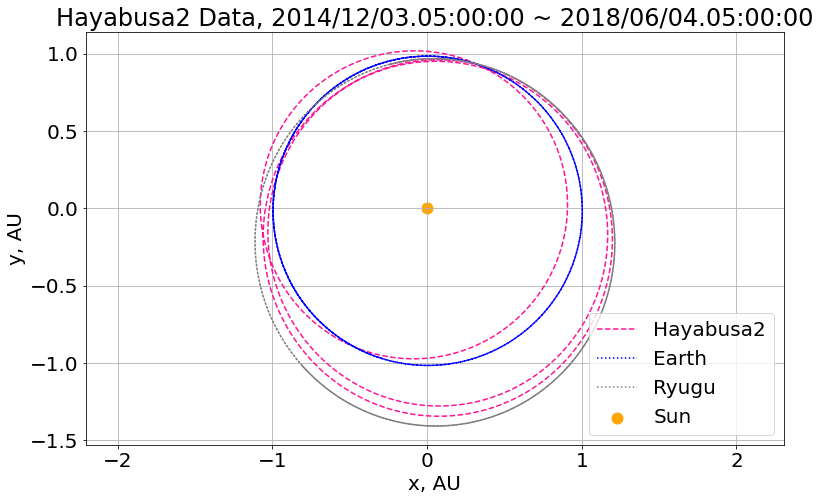

In [39]:
# trajectory plot
plt.rcParams["font.size"] = 20
fig, axs = plt.subplots(1, 1, figsize=(12, 8))

axs.scatter(0, 0, c='orange', label='Sun', s=120)
axs.plot(data['X_Hbs2'], data['Y_Hbs2'], c='deeppink', label='Hayabusa2', linestyle='--')
axs.plot(data['X_Earth'], data['Y_Earth'], c='b', label='Earth', linestyle=':')
axs.plot(data['X_1999JU3'], data['Y_1999JU3'], c='gray', label='Ryugu', linestyle=':')

axs.axis('equal')
axs.grid(True)
axs.set_xlabel('x, AU')
axs.set_ylabel('y, AU')
axs.set_title(f'Hayabusa2 Data, {tstart} ~ {tend}')
axs.legend(loc='lower right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Infer velocity vector
Since the data-set only offer position information (along with time), the velocity components are infered by Euler scheme central difference (forward/backward for the first and last data-points). The result is in the ecliptic coordinate system, in km/sec. 

The spiceypy function ```utc2et()``` is used to convert the time-stamp in UTC to et (ephemeris second). 

https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/FORTRAN/spicelib/utc2et.html

In [74]:
# define conversion from AU to km
au2km = 149597870700.0/1e3
au2km

149597870.7

In [130]:
VX_Hbs2,    VY_Hbs2,    VZ_Hbs2    = np.zeros(len(data),), np.zeros(len(data),), np.zeros(len(data),)
VX_Earth,   VY_Earth,   VZ_Earth   = np.zeros(len(data),), np.zeros(len(data),), np.zeros(len(data),)
VX_1999JU3, VY_1999JU3, VZ_1999JU3 = np.zeros(len(data),), np.zeros(len(data),), np.zeros(len(data),)
ets  = np.zeros(len(data),)  # array of ephemeris time
utcs = []                    # list of UTC, re-formated
for idx in tqdm(range(len(data)), desc='Infer velocities: '):
    # for first data: use forward difference
    if idx == 0:
        utcs.append( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        ets[idx]  = spice.utc2et( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        dt_min    = spice.utc2et( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        dt_pls    = spice.utc2et( data.iloc[idx+1,:]['UTC'].replace('/', '-').replace('.','T') )
        dt        = dt_pls - dt_min
        # hayabusa2
        VX_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['X_Hbs2'] - data.iloc[idx,:]['X_Hbs2']) / dt   # forward diff
        VY_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['Y_Hbs2'] - data.iloc[idx,:]['Y_Hbs2']) / dt   # forward diff
        VZ_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['Z_Hbs2'] - data.iloc[idx,:]['Z_Hbs2']) / dt   # forward diff
        # earth
        VX_Earth[idx] = au2km*(data.iloc[idx+1,:]['X_Earth'] - data.iloc[idx,:]['X_Earth']) / dt   # forward diff
        VY_Earth[idx] = au2km*(data.iloc[idx+1,:]['Y_Earth'] - data.iloc[idx,:]['Y_Earth']) / dt   # forward diff
        VZ_Earth[idx] = au2km*(data.iloc[idx+1,:]['Z_Earth'] - data.iloc[idx,:]['Z_Earth']) / dt   # forward diff
        # ryugu
        VX_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['X_1999JU3'] - data.iloc[idx,:]['X_1999JU3']) / dt   # forward diff
        VY_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['Y_1999JU3'] - data.iloc[idx,:]['Y_1999JU3']) / dt   # forward diff
        VZ_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['Z_1999JU3'] - data.iloc[idx,:]['Z_1999JU3']) / dt   # forward diff
        
    # for final data: use backward difference
    elif idx == len(data)-1:
        utcs.append( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        ets[idx]  = spice.utc2et( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        dt_min    = spice.utc2et( data.iloc[idx-1,:]['UTC'].replace('/', '-').replace('.','T') )
        dt_pls    = spice.utc2et( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        dt        = dt_pls - dt_min
        # hayabusa2
        VX_Hbs2[idx] = au2km*(data.iloc[idx,:]['X_Hbs2'] - data.iloc[idx-1,:]['X_Hbs2']) / dt   # backward diff
        VY_Hbs2[idx] = au2km*(data.iloc[idx,:]['Y_Hbs2'] - data.iloc[idx-1,:]['Y_Hbs2']) / dt   # backward diff
        VZ_Hbs2[idx] = au2km*(data.iloc[idx,:]['Z_Hbs2'] - data.iloc[idx-1,:]['Z_Hbs2']) / dt   # backward diff
        # earth
        VX_Earth[idx] = au2km*(data.iloc[idx,:]['X_Earth'] - data.iloc[idx-1,:]['X_Earth']) / dt   # backward diff
        VY_Earth[idx] = au2km*(data.iloc[idx,:]['Y_Earth'] - data.iloc[idx-1,:]['Y_Earth']) / dt   # backward diff
        VZ_Earth[idx] = au2km*(data.iloc[idx,:]['Z_Earth'] - data.iloc[idx-1,:]['Z_Earth']) / dt   # backward diff
        # ryugu
        VX_1999JU3[idx] = au2km*(data.iloc[idx,:]['X_1999JU3'] - data.iloc[idx-1,:]['X_1999JU3']) / dt   # backward diff
        VY_1999JU3[idx] = au2km*(data.iloc[idx,:]['Y_1999JU3'] - data.iloc[idx-1,:]['Y_1999JU3']) / dt   # backward diff
        VZ_1999JU3[idx] = au2km*(data.iloc[idx,:]['Z_1999JU3'] - data.iloc[idx-1,:]['Z_1999JU3']) / dt   # backward diff
        
    # for all other data: use central difference
    else:
        utcs.append( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        ets[idx]  = spice.utc2et( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        dt_min    = spice.utc2et( data.iloc[idx-1,:]['UTC'].replace('/', '-').replace('.','T') )
        dt_pls    = spice.utc2et( data.iloc[idx+1,:]['UTC'].replace('/', '-').replace('.','T') )
        dt        = dt_pls - dt_min
        # hayabusa2
        VX_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['X_Hbs2'] - data.iloc[idx-1,:]['X_Hbs2']) / (2*dt)   # central diff
        VY_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['Y_Hbs2'] - data.iloc[idx-1,:]['Y_Hbs2']) / (2*dt)   # central diff
        VZ_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['Z_Hbs2'] - data.iloc[idx-1,:]['Z_Hbs2']) / (2*dt)   # central diff
        # earth
        VX_Earth[idx] = au2km*(data.iloc[idx+1,:]['X_Earth'] - data.iloc[idx-1,:]['X_Earth']) / (2*dt)   # central diff
        VY_Earth[idx] = au2km*(data.iloc[idx+1,:]['Y_Earth'] - data.iloc[idx-1,:]['Y_Earth']) / (2*dt)   # central diff
        VZ_Earth[idx] = au2km*(data.iloc[idx+1,:]['Z_Earth'] - data.iloc[idx-1,:]['Z_Earth']) / (2*dt)   # central diff
        # ryugu
        VX_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['X_1999JU3'] - data.iloc[idx-1,:]['X_1999JU3']) / (2*dt)   # central diff
        VY_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['Y_1999JU3'] - data.iloc[idx-1,:]['Y_1999JU3']) / (2*dt)   # central diff
        VZ_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['Z_1999JU3'] - data.iloc[idx-1,:]['Z_1999JU3']) / (2*dt)   # central diff

In [131]:
# append velocities to dataframe
# ephemeris time
data['et'] = ets
data['UTC_formated'] = utcs
# hayabusa2
data['VX_Hbs2'] = VX_Hbs2
data['VY_Hbs2'] = VY_Hbs2
data['VZ_Hbs2'] = VZ_Hbs2
# earth
data['VX_Earth'] = VX_Earth
data['VY_Earth'] = VY_Earth
data['VZ_Earth'] = VZ_Earth
# ryugu
data['VX_1999JU3'] = VX_1999JU3
data['VY_1999JU3'] = VY_1999JU3
data['VZ_1999JU3'] = VZ_1999JU3

### Compute acceleration

In [132]:
AX_Hbs2,    AY_Hbs2,    AZ_Hbs2    = np.zeros(len(data),), np.zeros(len(data),), np.zeros(len(data),)
AX_Earth,   AY_Earth,   AZ_Earth   = np.zeros(len(data),), np.zeros(len(data),), np.zeros(len(data),)
AX_1999JU3, AY_1999JU3, AZ_1999JU3 = np.zeros(len(data),), np.zeros(len(data),), np.zeros(len(data),)
for idx in tqdm(range(len(data)), desc='Infer velocities: '):
    # for first data: use forward difference
    if idx == 0:
        dt_min    = spice.utc2et( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        dt_pls    = spice.utc2et( data.iloc[idx+1,:]['UTC'].replace('/', '-').replace('.','T') )
        dt        = dt_pls - dt_min
        # hayabusa2
        AX_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['VX_Hbs2'] - data.iloc[idx,:]['VX_Hbs2']) / dt   # forward diff
        AY_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['VY_Hbs2'] - data.iloc[idx,:]['VY_Hbs2']) / dt   # forward diff
        AZ_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['VZ_Hbs2'] - data.iloc[idx,:]['VZ_Hbs2']) / dt   # forward diff
        # earth
        AX_Earth[idx] = au2km*(data.iloc[idx+1,:]['VX_Earth'] - data.iloc[idx,:]['VX_Earth']) / dt   # forward diff
        AY_Earth[idx] = au2km*(data.iloc[idx+1,:]['VY_Earth'] - data.iloc[idx,:]['VY_Earth']) / dt   # forward diff
        AZ_Earth[idx] = au2km*(data.iloc[idx+1,:]['VZ_Earth'] - data.iloc[idx,:]['VZ_Earth']) / dt   # forward diff
        # ryugu
        AX_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['VX_1999JU3'] - data.iloc[idx,:]['VX_1999JU3']) / dt   # forward diff
        AY_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['VY_1999JU3'] - data.iloc[idx,:]['VY_1999JU3']) / dt   # forward diff
        AZ_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['VZ_1999JU3'] - data.iloc[idx,:]['VZ_1999JU3']) / dt   # forward diff
        
    # for final data: use backward difference
    elif idx == len(data)-1:
        dt_min    = spice.utc2et( data.iloc[idx-1,:]['UTC'].replace('/', '-').replace('.','T') )
        dt_pls    = spice.utc2et( data.iloc[idx,:]['UTC'].replace('/', '-').replace('.','T') )
        dt        = dt_pls - dt_min
        # hayabusa2
        AX_Hbs2[idx] = au2km*(data.iloc[idx,:]['VX_Hbs2'] - data.iloc[idx-1,:]['VX_Hbs2']) / dt   # backward diff
        AY_Hbs2[idx] = au2km*(data.iloc[idx,:]['VY_Hbs2'] - data.iloc[idx-1,:]['VY_Hbs2']) / dt   # backward diff
        AZ_Hbs2[idx] = au2km*(data.iloc[idx,:]['VZ_Hbs2'] - data.iloc[idx-1,:]['VZ_Hbs2']) / dt   # backward diff
        # earth
        AX_Earth[idx] = au2km*(data.iloc[idx,:]['VX_Earth'] - data.iloc[idx-1,:]['VX_Earth']) / dt   # backward diff
        AY_Earth[idx] = au2km*(data.iloc[idx,:]['VY_Earth'] - data.iloc[idx-1,:]['VY_Earth']) / dt   # backward diff
        AZ_Earth[idx] = au2km*(data.iloc[idx,:]['VZ_Earth'] - data.iloc[idx-1,:]['VZ_Earth']) / dt   # backward diff
        # ryugu
        AX_1999JU3[idx] = au2km*(data.iloc[idx,:]['VX_1999JU3'] - data.iloc[idx-1,:]['VX_1999JU3']) / dt   # backward diff
        AY_1999JU3[idx] = au2km*(data.iloc[idx,:]['VY_1999JU3'] - data.iloc[idx-1,:]['VY_1999JU3']) / dt   # backward diff
        AZ_1999JU3[idx] = au2km*(data.iloc[idx,:]['VZ_1999JU3'] - data.iloc[idx-1,:]['VZ_1999JU3']) / dt   # backward diff
        
    # for all other data: use central difference
    else:
        dt_min    = spice.utc2et( data.iloc[idx-1,:]['UTC'].replace('/', '-').replace('.','T') )
        dt_pls    = spice.utc2et( data.iloc[idx+1,:]['UTC'].replace('/', '-').replace('.','T') )
        dt        = dt_pls - dt_min
        # hayabusa2
        AX_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['VX_Hbs2'] - data.iloc[idx-1,:]['VX_Hbs2']) / (2*dt)   # central diff
        AY_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['VY_Hbs2'] - data.iloc[idx-1,:]['VY_Hbs2']) / (2*dt)   # central diff
        AZ_Hbs2[idx] = au2km*(data.iloc[idx+1,:]['VZ_Hbs2'] - data.iloc[idx-1,:]['VZ_Hbs2']) / (2*dt)   # central diff
        # earth
        AX_Earth[idx] = au2km*(data.iloc[idx+1,:]['VX_Earth'] - data.iloc[idx-1,:]['VX_Earth']) / (2*dt)   # central diff
        AY_Earth[idx] = au2km*(data.iloc[idx+1,:]['VY_Earth'] - data.iloc[idx-1,:]['VY_Earth']) / (2*dt)   # central diff
        AZ_Earth[idx] = au2km*(data.iloc[idx+1,:]['VZ_Earth'] - data.iloc[idx-1,:]['VZ_Earth']) / (2*dt)   # central diff
        # ryugu
        AX_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['VX_1999JU3'] - data.iloc[idx-1,:]['VX_1999JU3']) / (2*dt)   # central diff
        AY_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['VY_1999JU3'] - data.iloc[idx-1,:]['VY_1999JU3']) / (2*dt)   # central diff
        AZ_1999JU3[idx] = au2km*(data.iloc[idx+1,:]['VZ_1999JU3'] - data.iloc[idx-1,:]['VZ_1999JU3']) / (2*dt)   # central diff

In [133]:
# append accelerations to dataframe
# hayabusa2
data['AX_Hbs2'] = AX_Hbs2
data['AY_Hbs2'] = AY_Hbs2
data['AZ_Hbs2'] = AZ_Hbs2
# earth
data['AX_Earth'] = AX_Earth
data['AY_Earth'] = AY_Earth
data['AZ_Earth'] = AZ_Earth
# ryugu
data['AX_1999JU3'] = AX_1999JU3
data['AY_1999JU3'] = AY_1999JU3
data['AZ_1999JU3'] = AZ_1999JU3

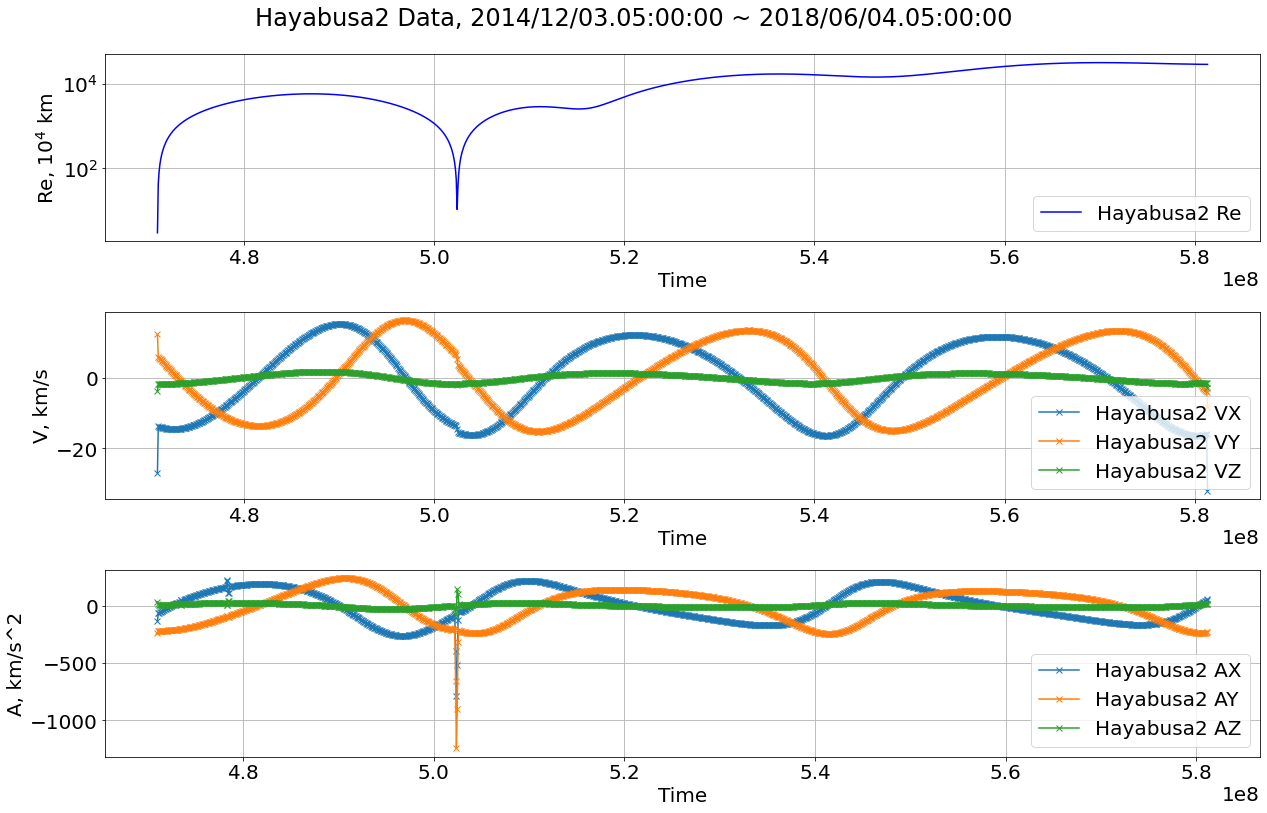

In [138]:
# time evolution of velocity
plt.rcParams["font.size"] = 20
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

# distance to Earth
axs[0].semilogy(data['et'], data['Re'], label='Hayabusa2 Re', c='b')

axs[0].grid(True)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Re, $10^4$ km')
axs[0].legend(loc='lower right')

# velocity plot
axs[1].plot(data['et'], data['VX_Hbs2'], label='Hayabusa2 VX', marker='x')
axs[1].plot(data['et'], data['VY_Hbs2'], label='Hayabusa2 VY', marker='x')
axs[1].plot(data['et'], data['VZ_Hbs2'], label='Hayabusa2 VZ', marker='x')

axs[1].grid(True)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('V, km/s')
axs[1].legend(loc='lower right')

# acceleration plot
axs[2].plot(data['et'][2:-2], data['AX_Hbs2'][2:-2], label='Hayabusa2 AX', marker='x')
axs[2].plot(data['et'][2:-2], data['AY_Hbs2'][2:-2], label='Hayabusa2 AY', marker='x')
axs[2].plot(data['et'][2:-2], data['AZ_Hbs2'][2:-2], label='Hayabusa2 AZ', marker='x')

axs[2].grid(True)
axs[2].set_xlabel('Time')
axs[2].set_ylabel('A, km/s^2')
axs[2].legend(loc='lower right')

plt.suptitle(f'Hayabusa2 Data, {tstart} ~ {tend}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [135]:
data

,UTC,L+,X_Hbs2,Y_Hbs2,Z_Hbs2,X_Earth,Y_Earth,Z_Earth,X_1999JU3,Y_1999JU3,...,UTC_formated,AX_Hbs2,AY_Hbs2,AZ_Hbs2,AX_Earth,AY_Earth,AZ_Earth,AX_1999JU3,AY_1999JU3,AZ_1999JU3
0,2014/12/03.05:00:00,0.0,0.325037,0.930594,-0.000010,0.325234,0.930600,-0.000031,-0.805848,-1.019952,...,2014-12-03T05:00:00,22914.026123,-10856.300278,3404.913508,24761.508358,-8403.983087,-2.248457e+00,-14312.178813,15966.293739,-1918.683377
1,2014/12/04.05:00:00,1.0,0.309534,0.937664,-0.002231,0.308668,0.936062,-0.000030,-0.796246,-1.030534,...,2014-12-04T05:00:00,5629.012305,-2836.428609,875.399291,6156.088119,-2209.296454,-7.494857e-01,-3538.509333,4043.475319,-477.422387
2,2014/12/05.05:00:00,2.0,0.293598,0.944389,-0.004351,0.292008,0.941235,-0.000030,-0.786536,-1.040977,...,2014-12-05T05:00:00,-134.720053,-235.713251,31.665771,-66.891598,-217.163480,-1.099364e-12,78.321255,103.803769,4.309543
3,2014/12/06.05:00:00,3.0,0.277564,0.950806,-0.006443,0.275259,0.946119,-0.000030,-0.776723,-1.051282,...,2014-12-06T05:00:00,-67.078970,-224.283594,11.429657,-63.518913,-218.287708,1.873714e-01,77.197026,103.991140,4.122171
4,2014/12/07.05:00:00,4.0,0.261440,0.956926,-0.008523,0.258425,0.950711,-0.000029,-0.766806,-1.061448,...,2014-12-07T05:00:00,-61.083084,-221.098280,6.932743,-59.771484,-219.224566,-1.873714e-01,75.698055,104.553254,4.122171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2018/05/31.05:00:00,1275.0,-0.178935,0.945280,-0.048265,-0.355620,-0.949381,0.000040,-0.178914,0.945334,...,2018-05-31T05:00:00,42.908056,-234.963765,11.617028,75.698055,200.862166,1.873714e-01,44.407027,-234.401651,11.804400
1276,2018/06/01.05:00:00,1276.0,-0.197571,0.941389,-0.049961,-0.339745,-0.955346,0.000041,-0.197557,0.941438,...,2018-06-01T05:00:00,47.592342,-233.839537,12.366514,72.137998,202.361138,-1.873714e-01,49.091313,-233.464794,12.553885
1277,2018/06/02.05:00:00,1277.0,-0.216144,0.937186,-0.051640,-0.323774,-0.961041,0.000042,-0.216135,0.937231,...,2018-06-02T05:00:00,52.651370,-232.902680,12.741257,69.140055,203.485366,-1.873714e-01,53.775599,-232.715308,12.741257
1278,2018/06/03.05:00:00,1278.0,-0.234646,0.932673,-0.053302,-0.307711,-0.966464,0.000042,-0.234641,0.932713,...,2018-06-03T05:00:00,-6863.227879,-1982.389663,-606.896041,6103.436756,-1777.405325,5.621143e-01,-6863.040508,-1982.951777,-606.708670


### Osculating elements

Orbital elements of the object